# Tests use to check the assumptions of ANOVA
1. QQ plot
2. Shapiro-Wilk test
3. Bartlett's test
4. Levene's test

In [ ]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

In [ ]:
# Import the dataset

diabetes = pd.read_csv('diabetesRCT180.csv')
diabetes.head()

,Patient_ID,Age,BMI,Status,Sex,HbA1c_0,HbA1c_6,HbA1c_12,Systolic_0,Systolic_6,Systolic_12,Aspirin_0,Aspirin_6,Aspirin_12,Education
0,131,64,31.66,0,1,8.0,7.4,8.1,140,166,136,0,0,0,1
1,140,31,25.23,1,0,11.0,10.2,12.6,131,120,110,0,1,1,1
2,159,70,27.17,0,0,8.7,9.6,11.0,110,140,140,1,1,1,0
3,173,45,36.21,1,1,15.2,6.4,6.7,130,144,158,1,1,1,2
4,98,46,41.88,1,0,9.0,7.3,6.9,136,136,124,0,1,1,1


## QQ plot
Ideally, if the samples come from a normally distributed population, the points should be lying near the 45 degree straight line.

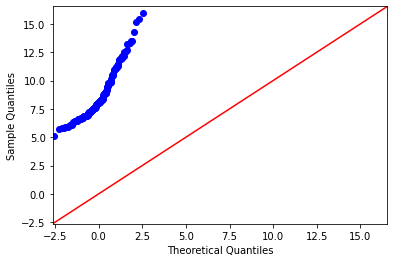

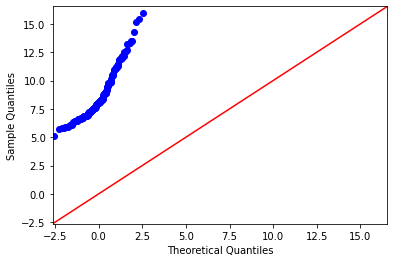

In [ ]:
Hb12 = diabetes['HbA1c_12']
sm.qqplot(Hb12, line='45')

The above actual data from our dataset, specifically the measure of glucose as HbA1c on 12th month, is not normally distributed.

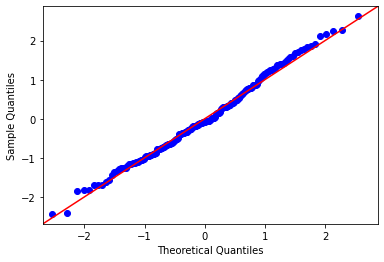

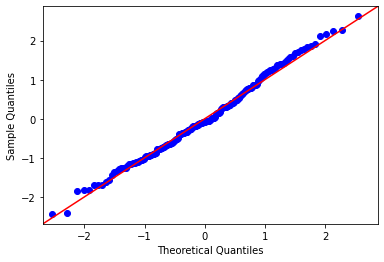

In [ ]:
IdealGlucose = np.random.normal(0, 1, 180)
sm.qqplot(IdealGlucose, line='45')

The random generated dataset above has a normal distribution because almost all the points are lying in the 45 degree line.

## Shapiro-Wilk Test
Use to check the **normal distribution of residuals**.
<br>
$H_0$: The data is drawn from a normal distribution
<br>
$H_1$: The data is not drawn from a normal distribution
<br>
$\alpha = 0.05$

In [ ]:
# Perform Shapiro-Wilk test on the 12th month HbA1c level
ShapiroWilk, pval = stats.shapiro(Hb12)
ShapiroWilk, pval

(0.9162387847900391, 1.2724584941281591e-08)

The resulting p-value is 1.27e-18 which is smaller than 0.05, which means that we will reject the null hypothesis. Our dataset was not drawn from a normal distribution.

In [ ]:
# Perform Shapiro-Wilk test on the Ideal Glucose level
ShapiroWilk, pval = stats.shapiro(IdealGlucose)
ShapiroWilk, pval

(0.9914979338645935, 0.3689068555831909)

The resulting p-value is 0.37 which is larger than 0.05, which means that we will not reject the null hypothesis. Our dataset was drawn from a normal distribution.

## Bartlett's test
Use to check the **homogeneity of variances**.
<br>
$H_0$: The samples drawn from the population have equal variances.
<br>
$H_1$: The samples drawn from the population do not have equal variances.
<br>
$\alpha = 0.05$

In [ ]:
# Create subset containing the other glucose measurements
Hb0 = diabetes['HbA1c_0']
Hb6 = diabetes['HbA1c_6']

# Perform a Bartlett's test on all glucose measurements
from scipy.stats import bartlett
Bstat, pval = bartlett(Hb0, Hb6, Hb12)
Bstat, pval

(6.1521777501534824, 0.0461393610189372)

The resulting p-value is 0.046 which is smaller than 0.05, which means that we will reject the null hypothesis. Our samples are drawn from the population that do not have equal variances.

## Levene's test
Use to check the homogeneity of variances when the dataset didn't comes from a normal distribution
$\alpha = 0.05$

In [ ]:
Lstat, pval = stats.levene(Hb0, Hb6, Hb12)
Lstat, pval

(0.943130462152465, 0.39005094685163044)

The resulting p-value is 0.39 which is larger than 0.05, which means that we will not reject the null hypothesis. The groups have no significant difference in their variability.